### CIFAR-10 Image Dataset - PCA

1. Data Source- https://www.cs.toronto.edu/~kriz/cifar.html
2. About Data- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

In [77]:
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import sklearn.manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.manifold import MDS



In [2]:
#load data's code taken from  https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
def createPlot(im):
    r = im[0:1024].reshape(32, 32)
    g = im[1024:2048].reshape(32, 32)
    b = im[2048:].reshape(32, 32)
    img = np.dstack((r, g, b))
    plt.imshow(img)
    plt.show()

In [3]:
a =unpickle(file="../CIFAR_Image_PCA/cifar-10-batches-py/data_batch_1")
b =unpickle(file="../CIFAR_Image_PCA/cifar-10-batches-py/data_batch_2")
c =unpickle(file="../CIFAR_Image_PCA/cifar-10-batches-py/data_batch_3")
d =unpickle(file="../CIFAR_Image_PCA/cifar-10-batches-py/data_batch_4")
e =unpickle(file="../CIFAR_Image_PCA/cifar-10-batches-py/data_batch_5")
f =unpickle(file="../CIFAR_Image_PCA/cifar-10-batches-py/test_batch")

meta =unpickle(file="../CIFAR_Image_PCA/cifar-10-batches-py/batches.meta")
#Concat dictionary

d = dict(a)
d.update(b)
d.update(c)
d.update(d)
d.update(e)
d.update(f)

In [4]:
d.get(b'data')

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ..., 
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [5]:
d.get(b'labels')[1]

8

In [6]:
d.get(b'data').shape

(10000, 3072)

In [7]:
#get unique labels/categories
list(set(d.get(b'labels')))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
# 0 airplane
# 1 automobile
# 2 bird
# 3 cat
# 4 deer
# 5 dog
# 6 frog
# 7 horse
# 8 ship
# 9 truck
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
np.array(meta.get(b'label_names'))


array([b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog',
       b'frog', b'horse', b'ship', b'truck'],
      dtype='|S10')

## Part 1: For each category,
###   1. compute the mean image and the first 20 principal components.
### 2. Plot the error resulting from representing the images of each category using the first 20 principal components against the category.



In [34]:
#create a pandas DF
images = pd.DataFrame( np.array(d.get(b'data')))
labels =pd.DataFrame( np.array(d.get(b'labels')))
images["labels"] =labels


In [35]:
images.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,158,159,165,166,160,156,162,159,158,159,...,123,145,167,182,175,145,124,129,110,3
1,235,231,232,232,232,232,232,232,232,232,...,117,123,133,141,153,163,178,191,199,8
2,158,158,139,132,166,182,187,193,199,205,...,46,44,44,43,52,37,8,3,7,8
3,155,167,176,190,177,166,168,166,170,179,...,55,70,103,105,72,53,50,52,50,0
4,65,70,48,30,23,40,44,45,45,40,...,127,156,139,131,130,147,136,146,117,6


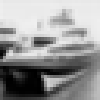

In [12]:
Image.fromarray(np.array(d.get(b'data'))[1][:1024].reshape(32,32)).resize((100, 100))


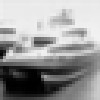

In [13]:
Image.fromarray(np.array(d.get(b'data'))[1][1024:2048].reshape(32,32)).resize((100, 100))

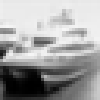

In [14]:
Image.fromarray(np.array(d.get(b'data'))[1][2048:3072].reshape(32,32)).resize((100, 100))

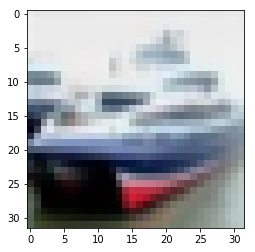

In [15]:

createPlot(im = np.array(d.get(b'data').astype('uint8'))[1])

# Part 1

In [37]:
#group df by labels
groups = images.groupby('labels')

In [130]:
meanimages = []
centered =[]
pcaError =[]
for i, cat in enumerate(categories):
    group = groups.get_group(i)
    grp =group.drop("labels", axis=1).reset_index(drop=True)
    #Part1
    ##MEAN IMAGE
    m =grp.mean().astype('uint8')
    meanimages.append(m)
    centered.append(grp - m)
    
    ##PCA 20
    pca = PCA(n_components=20)
    pca.fit(grp)    
    
    ##Error
    components = pca.transform(grp)
    inv = pd.DataFrame(pca.inverse_transform(components))
    pcaError.append(int(np.square(grp-inv).sum(axis=1).mean()))


airplane


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


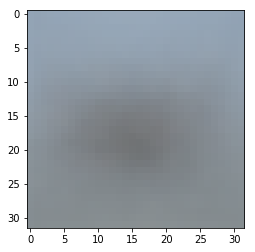

automobile


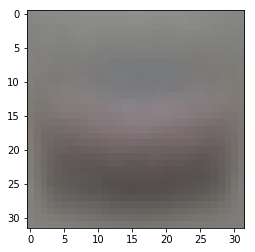

bird


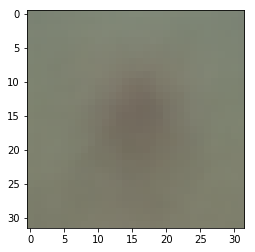

cat


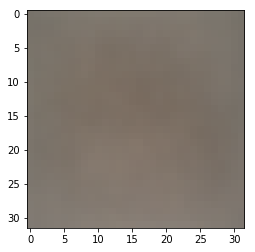

deer


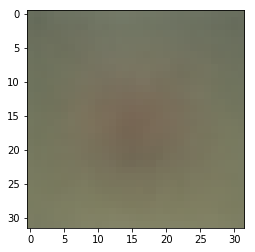

dog


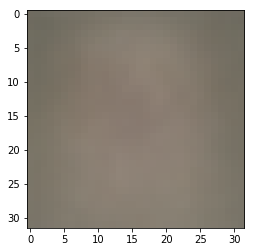

frog


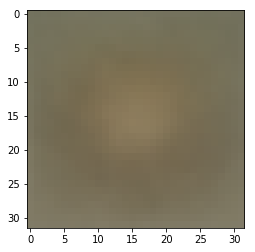

horse


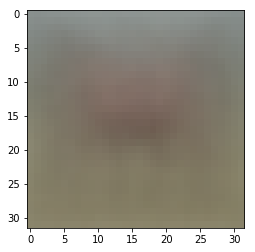

ship


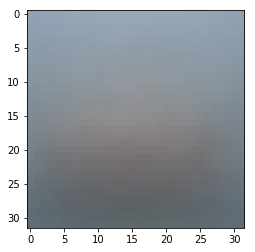

truck


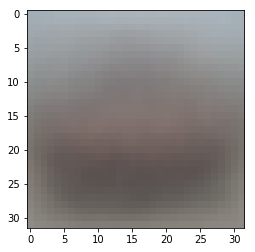

In [131]:
for i, cat in enumerate(categories):
    print(cat)
    createPlot(meanimages[i])

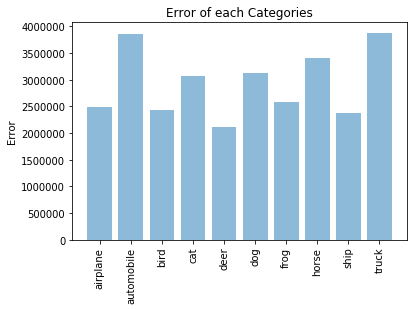

In [132]:
plt.bar(categories, pcaError, align='center', alpha=0.5)
plt.ylabel('Error')
plt.xticks(rotation=90)
plt.title('Error of each Categories')
plt.show()

# Part 2

In [95]:
similarities = euclidean_distances(meanimages)
pd.DataFrame(similarities)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1834.101415,1711.634599,2027.760094,2349.357359,1991.162726,2556.765535,1719.123614,1084.982949,1513.963672
1,1834.101415,0.000000,908.030286,1043.826135,1180.504130,1216.553739,1188.214627,944.744410,1288.484381,994.302771
2,1711.634599,908.030286,0.000000,516.238317,690.267340,658.833818,919.684185,455.821237,1540.931861,1410.780989
3,2027.760094,1043.826135,516.238317,0.000000,514.417146,477.727956,674.235122,634.840925,1864.484647,1672.797358
4,2349.357359,1180.504130,690.267340,514.417146,0.000000,718.430929,424.325347,821.303841,2117.221764,1876.926743
5,1991.162726,1216.553739,658.833818,477.727956,718.430929,0.000000,902.028270,834.124091,1845.342516,1837.569318
6,2556.765535,1188.214627,919.684185,674.235122,424.325347,902.028270,0.000000,994.340988,2230.945539,1910.186378
7,1719.123614,944.744410,455.821237,634.840925,821.303841,834.124091,994.340988,0.000000,1573.712172,1268.499113
8,1084.982949,1288.484381,1540.931861,1864.484647,2117.221764,1845.342516,2230.945539,1573.712172,0.000000,1041.952014
9,1513.963672,994.302771,1410.780989,1672.797358,1876.926743,1837.569318,1910.186378,1268.499113,1041.952014,0.000000


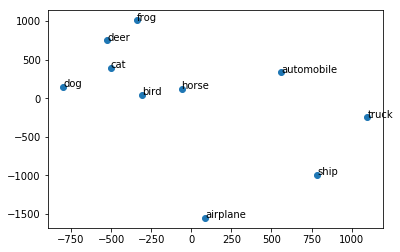

In [122]:
mds = MDS(n_components=2, random_state=1, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_
plt.figure()
plt.scatter(pos[:,0], pos[:,1],)
for i in range (0,10):
    xy=(pos[i][0],pos[i][1])
    plt.annotate(categories[i],xy)
plt.show()

# Part3

,0,1,2,3,4,5,6,7,8,9
0,10026219.0,10065115.0,9979653.0,10042804.0,10063865.0,10134446.0,10096705.0,10044150.0,10043655.0,10066910.0
1,10065115.0,36691958.0,36828203.0,36689624.0,36698136.0,36787330.0,36574956.0,36826610.0,36673164.0,36636576.0
2,9979653.0,36828203.0,16368769.0,16394819.0,16380961.0,16399765.0,16353808.0,16556632.0,16464373.0,16461083.0
3,10042804.0,36689624.0,16394819.0,16558069.0,16562709.0,16625587.0,16526088.0,16694625.0,16503056.0,16920671.0
4,10063865.0,36698136.0,16380961.0,16562709.0,25346287.0,25328657.0,25408172.0,25324092.0,25325152.0,25407894.0
5,10134446.0,36787330.0,16399765.0,16625587.0,25328657.0,25421182.0,25516896.0,25617172.0,25376472.0,25606348.0
6,10096705.0,36574956.0,16353808.0,16526088.0,25408172.0,25516896.0,16181731.0,16239482.0,16175171.0,16322796.0
7,10044150.0,36826610.0,16556632.0,16694625.0,25324092.0,25617172.0,16239482.0,43228611.0,43497813.0,43509112.0
8,10043655.0,36673164.0,16464373.0,16503056.0,25325152.0,25376472.0,16175171.0,43497813.0,19353334.0,19107056.0
9,10066910.0,36636576.0,16461083.0,16920671.0,25407894.0,25606348.0,16322796.0,43509112.0,19107056.0,16415594.0


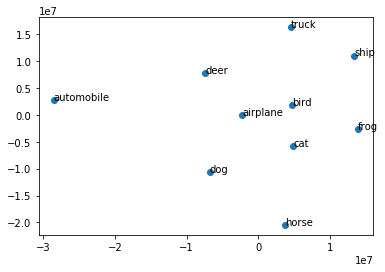

In [136]:
pcaError = np.zeros((10,10))
for i in range(0,10):
    for j in range(i,10):
        group = groups.get_group(i)
        grp =group.drop("labels", axis=1).reset_index(drop=True)     
        
        groupJ = groups.get_group(j)
        grpJ =groupJ.drop("labels", axis=1).reset_index(drop=True)
                                                      
        #get PCA of B
        pca = PCA(n_components=20)
        pca.fit(grpJ)    
        
        component = pca.transform(grp)
        inv = pd.DataFrame(pca.inverse_transform(component))
        error = int(np.square(grp-inv).sum(axis=1).mean())
        pcaError[i][j] = error
        #mirror diagonally
        pcaError[j][i] = error

display(pd.DataFrame(pcaError))

mds = MDS(n_components=2, random_state=1, dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(pcaError).embedding_
plt.figure()
plt.scatter(pos[:,0], pos[:,1])
for i in range (0,10):
    xy=(pos[i][0],pos[i][1])
    plt.annotate(categories[i],xy)
plt.show() 